In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import cv2 as cv
import numpy as np
import os 
import tensorflow as tf
import matplotlib.pyplot as plt
import pickle
import random
from tqdm import tqdm 

[[142 142 143 ... 162 162 162]
 [142 143 143 ... 162 162 163]
 [143 143 143 ... 164 164 164]
 ...
 [121 129 125 ...  83  76  82]
 [124 119 121 ... 176  82  75]
 [120 118 117 ... 162 172  80]]


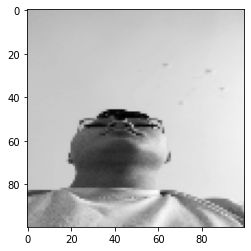

In [3]:
datadir = "/content/drive/MyDrive/faceid"
categories=['Dung','Long','Thien']
img_size=100
for category in categories:
  path=os.path.join(datadir,category)
  for img in os.listdir(path):
    img_array = cv.imread(os.path.join(path,img),cv.IMREAD_GRAYSCALE)
    new_array = cv.resize(img_array,(img_size,img_size))
    print(new_array)
    plt.imshow(new_array,cmap='gray')
    plt.show()
    break
  break

In [4]:
training_data=[]
def create_traning_data():

  for category in categories:
    path = os.path.join(datadir,category)
    class_num = categories.index(category)

    for img in tqdm(os.listdir(path)):
      try:
        img_array = cv.imread(os.path.join(path,img),cv.IMREAD_GRAYSCALE)
        new_array = cv.resize(img_array,(img_size,img_size))
        training_data.append([new_array,class_num])
      except Exception as e:
        pass
create_traning_data()
print(len(training_data))

100%|██████████| 50/50 [00:27<00:00,  1.83it/s]

150


In [5]:
#saving (x:picture), (y:label)
x=[]
y=[]
for features, label in training_data :
  x.append(features)
  y.append(label)
x=np.array(x).reshape(-1,img_size,img_size,1)
y=np.array(y)
print('x',x.shape)
print('y',y.shape)

x (150, 100, 100, 1)
y (150,)


In [6]:
#saving x, y as file.pickle into drive
pickle_out=open("/content/drive/MyDrive/Pickle/faceid/x.pickle","wb")
pickle.dump(x,pickle_out)
pickle_out.close()

pickle_out=open("/content/drive/MyDrive/Pickle/faceid/y.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()

In [7]:
#BUILD MODEL
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from tensorflow.keras.layers import Conv2D
from keras.layers.convolutional import MaxPooling2D
from tensorflow.keras.utils import to_categorical

In [8]:
pickle_in = open("/content/drive/MyDrive/Pickle/faceid/x.pickle","rb")
X= pickle.load(pickle_in)

pickle_in = open("/content/drive/MyDrive/Pickle/faceid/y.pickle","rb")
y= pickle.load(pickle_in)

X=X/255.0
print('X',X.shape)
print('y',y.shape)

X (150, 100, 100, 1)
y (150,)


In [9]:
y= to_categorical(y,10)

In [10]:
y.shape

(150, 10)

In [11]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(100,100,1)))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(10,activation='softmax'))

In [12]:
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import SGD,Adam
opt =SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(X,y,epochs=150,batch_size=64,validation_split=0.2,verbose=1)

Epoch 1/150
2/2 [==============================] - 13s 1s/step - loss: 3.4236 - accuracy: 0.1917 - val_loss: 1.8445 - val_accuracy: 0.0000e+00
Epoch 2/150
2/2 [==============================] - 0s 72ms/step - loss: 2.6664 - accuracy: 0.4167 - val_loss: 1.6858 - val_accuracy: 0.0000e+00
Epoch 3/150
2/2 [==============================] - 0s 72ms/step - loss: 1.9793 - accuracy: 0.4167 - val_loss: 1.7274 - val_accuracy: 0.0000e+00
Epoch 4/150
2/2 [==============================] - 0s 73ms/step - loss: 1.1288 - accuracy: 0.4583 - val_loss: 2.4988 - val_accuracy: 0.0000e+00
Epoch 5/150
2/2 [==============================] - 0s 76ms/step - loss: 3.8569 - accuracy: 0.4667 - val_loss: 1.7973 - val_accuracy: 1.0000
Epoch 6/150
2/2 [==============================] - 0s 71ms/step - loss: 2.0263 - accuracy: 0.1667 - val_loss: 1.8818 - val_accuracy: 1.0000
Epoch 7/150
2/2 [==============================] - 0s 72ms/step - loss: 1.9907 - accuracy: 0.1667 - val_loss: 1.4110 - val_accuracy: 1.0000
Epoch

In [13]:
model.save('faceid.h5')

In [14]:
from keras.models import load_model
from keras.preprocessing.image import load_img,img_to_array
# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, target_size=(100, 100))	
	
	return img
labels = {0: 'Dung',  1: 'Long',2: 'Thien'}
model = load_model('faceid.h5')

[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
expectation Thien


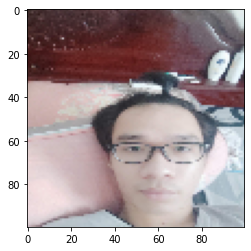

In [17]:
	# load model
img = load_image('03.jpg')
plt.imshow(img)
img = img_to_array(img)
img.shape
img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
img = img.reshape(1,100,100,1)  
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('expectation',labels[np.argmax(result)])

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
expectation Dung


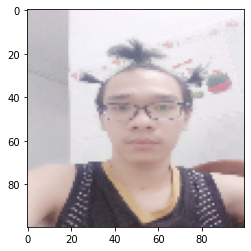

In [21]:
# load model
img = load_image('08.jpg')
plt.imshow(img)
img = img_to_array(img)
img.shape
img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
img = img.reshape(1,100,100,1)  
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('expectation',labels[np.argmax(result)])

[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
expectation Thien


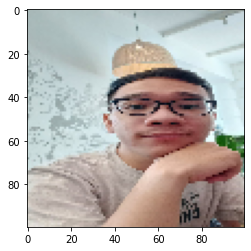

In [22]:
# load model
img = load_image('09.jpg')
plt.imshow(img)
img = img_to_array(img)
img.shape
img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
img = img.reshape(1,100,100,1)  
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('expectation',labels[np.argmax(result)])

[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
expectation Long


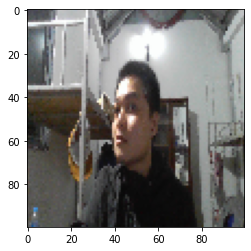

In [24]:
# load model
img = load_image('1 (51).jpg')
plt.imshow(img)
img = img_to_array(img)
img.shape
img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
img = img.reshape(1,100,100,1)  
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('expectation',labels[np.argmax(result)])

[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
expectation Long


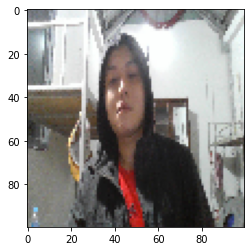

In [25]:
# load model
img = load_image('1 (52).jpg')
plt.imshow(img)
img = img_to_array(img)
img.shape
img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
img = img.reshape(1,100,100,1)  
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('expectation',labels[np.argmax(result)])

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
expectation Dung


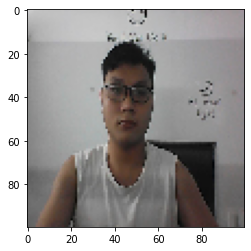

In [28]:
# load model
img = load_image('dung (2).jpg')
plt.imshow(img)
img = img_to_array(img)
img.shape
img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
img = img.reshape(1,100,100,1)  
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('expectation',labels[np.argmax(result)])

[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
expectation Thien


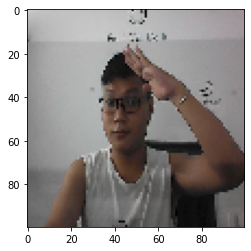

In [29]:
# load model
img = load_image('dung (3).jpg')
plt.imshow(img)
img = img_to_array(img)
img.shape
img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
img = img.reshape(1,100,100,1)  
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('expectation',labels[np.argmax(result)])